In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [57]:
dataset = pd.read_csv("/content/all-data.csv", encoding='ISO-8859-1')

In [58]:
dataset.head()


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [59]:
new = dataset.columns[0],dataset.columns[1]


In [60]:
dataset.columns[1]


'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [61]:
# Rename a column
dataset = dataset.rename(columns={'neutral': 'Sentiment'})
dataset = dataset.rename(columns={'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'Sentence'})

In [62]:
dataset.head()


,Sentiment,Sentence
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [63]:
dataset['Sentiment'].value_counts()


,count
Sentiment,
neutral,2878
positive,1363
negative,604


<Axes: xlabel='Sentiment', ylabel='count'>

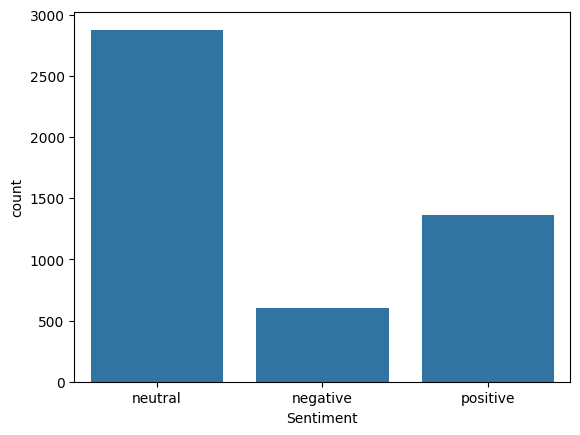

In [64]:
sns.countplot(data=dataset,x='Sentiment')


In [65]:
dataset.shape


(4845, 2)

In [66]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   Sentence   4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [67]:
dataset.describe()


,Sentiment,Sentence
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [68]:
dataset.isnull().sum()


,0
Sentiment,0
Sentence,0


In [69]:
dataset = dataset.drop_duplicates()


In [70]:
dataset.shape


(4839, 2)

<Axes: xlabel='Sentiment', ylabel='count'>

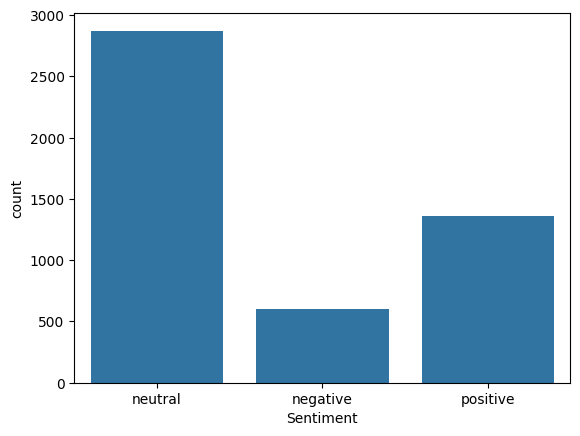

In [71]:
sns.countplot(data=dataset,x='Sentiment')


In [72]:
dataset['Sentiment'].value_counts()


,count
Sentiment,
neutral,2872
positive,1363
negative,604


In [73]:
## MultiOutputClassifier
df = dataset.copy()
new = pd.get_dummies(df, columns=['Sentiment'],dtype=float)
for col in new:
    if new[col].dtype == 'float64':
        new[col]=new[col].astype(int)

In [74]:
dataset.replace({'Sentiment':{'neutral':0,'negative':-1,'positive':1}},inplace=True)

<ipython-input-74-a4b723260019>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Sentiment':{'neutral':0,'negative':-1,'positive':1}},inplace=True)


In [75]:
dataset.isnull().sum()


,0
Sentiment,0
Sentence,0


In [76]:
dataset = dataset.reset_index()


In [77]:
dataset.head(10)


,index,Sentiment,Sentence
0,0,0,Technopolis plans to develop in stages an area...
1,1,-1,The international electronic industry company ...
2,2,1,With the new production plant the company woul...
3,3,1,According to the company 's updated strategy f...
4,4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5,5,1,"For the last quarter of 2010 , Componenta 's n..."
6,6,1,"In the third quarter of 2010 , net sales incre..."
7,7,1,Operating profit rose to EUR 13.1 mn from EUR ...
8,8,1,"Operating profit totalled EUR 21.1 mn , up fro..."
9,9,1,TeliaSonera TLSN said the offer is in line wit...


In [78]:
Y = dataset['Sentiment']
X = dataset['Sentence']

In [79]:
Y


,Sentiment
0,0
1,-1
2,1
3,1
4,1
...,...
4834,-1
4835,0
4836,-1
4837,-1


In [80]:
X


,Sentence
0,Technopolis plans to develop in stages an area...
1,The international electronic industry company ...
2,With the new production plant the company woul...
3,According to the company 's updated strategy f...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...
4834,LONDON MarketWatch -- Share prices ended lower...
4835,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4836,Operating profit fell to EUR 35.4 mn from EUR ...
4837,Net sales of the Paper segment decreased to EU...


In [81]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
stemmer = PorterStemmer()


In [84]:
def text_clean(data):
    corpus = []
    for i in range(len(data)):
        review = re.sub("[^a-zA-Z0-9]"," ",data[i])
        review = review.lower()
        review = review.split()
        review = [stemmer.stem(words) for words in review if words not in set(stopwords.words('english'))]
        review = " ".join(review)
        corpus.append(review)
    return corpus

In [85]:
X = text_clean(X)
X = np.array(X)

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [87]:
print(X_train.shape,X_test.shape,y_train.shape)


(3871,) (968,) (3871,)


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [89]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=5000)
regressor.fit(X_train_vectorized,y_train)

x_test_pred = regressor.predict(X_test_vectorized)
x_test_accuracy = accuracy_score(x_test_pred,y_test)

print("The accuracy of test set is: {}".format(x_test_accuracy))

The accuracy of test set is: 0.7479338842975206


In [90]:
X = new['Sentence']
Y = new.drop(columns=['Sentence'],axis=1)

In [91]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,Y,test_size=0.2,random_state=42)

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
new_vectorizer = CountVectorizer()
X_train1_vectorized = new_vectorizer.fit_transform(X_train1)
X_test1_vectorized = new_vectorizer.transform(X_test1)

In [93]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.multioutput import MultiOutputClassifier # Multi Output Classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest Classifier
from sklearn.ensemble import GradientBoostingClassifier # GradientBoost Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [94]:
models = {
    "Logistic Regression":LogisticRegression(max_iter=10000),
    "Random Forest":RandomForestClassifier(),
    "GradientBoosting":GradientBoostingClassifier()
}
params = {
    "Logistic Regression":{},
    "Random Forest":{},
    "GradientBoosting":{}
}

In [95]:
def evaluate_models(X_train, Y_train,X_test,Y_test,models,param):
        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3)
            gs.fit(X_train,Y_train)

            # logging.info(f'Hyperparameter {gs} filled')

            model.set_params(**gs.best_params_)
            model.fit(X_train,Y_train)


            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = accuracy_score(Y_train, y_train_pred)

            test_model_score = accuracy_score(Y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score

        return report

In [96]:
model_report:dict=evaluate_models(X_train_vectorized,y_train,X_test_vectorized,y_test,models,params)

## To get best model score from dict
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict

best_model_name = list(model_report.keys())[
list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]

print("This is the best model:")
print(best_model_name)

model_names = list(params.keys())

actual_model=""

for model in model_names:
    if best_model_name == model:
        actual_model = actual_model + model

        best_params = params[actual_model]

This is the best model:
GradientBoosting


In [97]:
def evaluate_models(X_train, Y_train,X_test,Y_test,models,param):
        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3)
            gs.fit(X_train,Y_train)

            # logging.info(f'Hyperparameter {gs} filled')

            model.set_params(**gs.best_params_)
            model.fit(X_train,Y_train)


            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = accuracy_score(Y_train, y_train_pred)

            test_model_score = accuracy_score(Y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score

        return report

In [100]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

gbc = GradientBoostingClassifier()
gbc.fit(X_train_vectorized,y_train)

x_test_pred = gbc.predict(X_test_vectorized)
x_test_accuracy = accuracy_score(x_test_pred,y_test)

print("The accuracy of test set is: {}".format(x_test_accuracy))

The accuracy of test set is: 0.7541322314049587
